In [1]:
import os

In [2]:
data_dir = 'C:\\Users\\aashi\\Desktop\\DEProjects\\Lecture Notes\\cnn\\cell_images'
os.listdir(data_dir)

['test', 'train']

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [4]:
test_path = data_dir + '\\test\\'
train_path = data_dir + '\\train\\'

In [5]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [6]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [7]:
para_cell = train_path+'parasitized\\'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

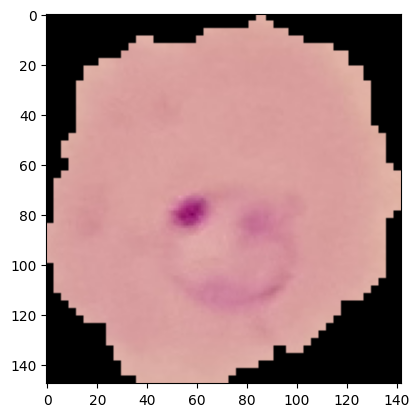

In [8]:
plt.imshow(imread(para_cell))

In [9]:
uninfected_cell = train_path+'uninfected\\'+os.listdir(train_path+'uninfected')[0]
uninfected_cell

'C:\\Users\\aashi\\Desktop\\DEProjects\\Lecture Notes\\cnn\\cell_images\\train\\uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [10]:
imread(uninfected_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

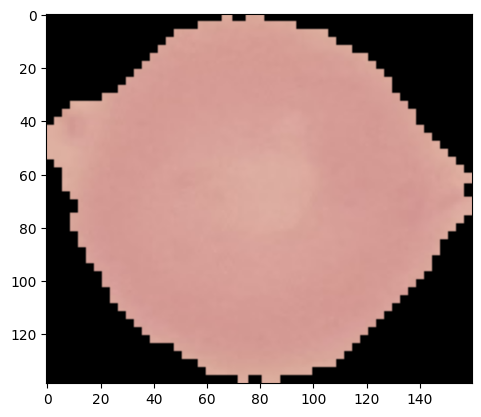

In [11]:
plt.imshow(imread(uninfected_cell))

In [12]:
# pwd
# print(len(os.listdir(train_path+'parasitized')), len(os.listdir(train_path+'uninfected')))
# print(len(os.listdir(test_path+'parasitized')), len(os.listdir(test_path+'uninfected')))
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

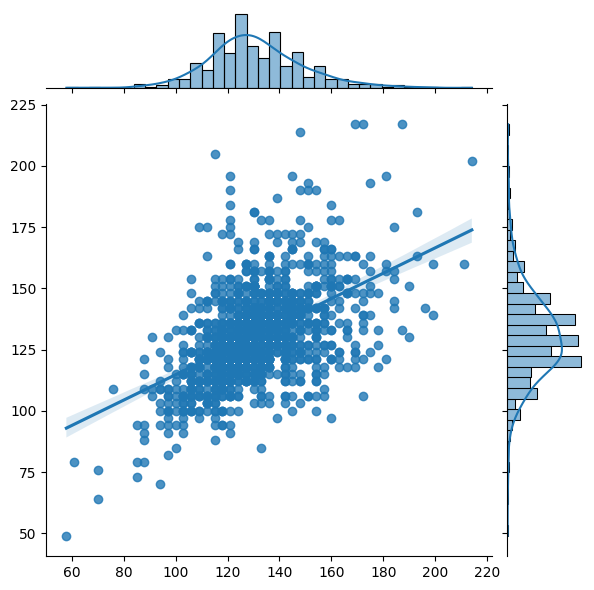

In [13]:
# sns.set(rc={'figure.figsize':(20,20)})
sns.jointplot(x=dim1,y=dim2, kind='reg')

In [14]:
print(np.mean(dim1), np.mean(dim2))

130.92538461538462 130.75


In [15]:
image_shape = (130, 130, 3)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
# help(ImageDataGenerator)
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

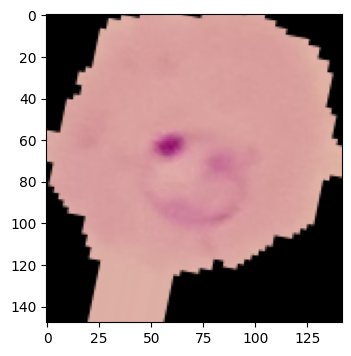

In [18]:
plt.figure(figsize=(4,4))
plt.imshow(image_gen.random_transform(imread(para_cell)))

In [19]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [20]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\aashi\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [24]:
batch_size = 16
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,class_mode='binary')

Found 24958 images belonging to 2 classes.


In [25]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2],color_mode='rgb',batch_size=batch_size,class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [26]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [27]:
results = model.fit(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

C:\Users\aashi\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 1010s 646ms/step - accuracy: 0.5346 - loss: 1.8626 - val_accuracy: 0.5858 - val_loss: 0.6769
Epoch 2/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 507s 325ms/step - accuracy: 0.5759 - loss: 0.6795 - val_accuracy: 0.5842 - val_loss: 0.6731
Epoch 3/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 495s 317ms/step - accuracy: 0.5922 - loss: 0.6725 - val_accuracy: 0.6292 - val_loss: 0.6568
Epoch 4/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 495s 317ms/step - accuracy: 0.6145 - loss: 0.6662 - val_accuracy: 0.5662 - val_loss: 0.6790
Epoch 5/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 494s 317ms/step - accuracy: 0.6067 - loss: 0.6639 - val_accuracy: 0.6100 - val_loss: 0.6625


In [28]:
# from tensorflow.keras.models import load_model
# model = load_model('malaria_predictor.h5')
losses = pd.DataFrame(model.history.history)

<Axes: >

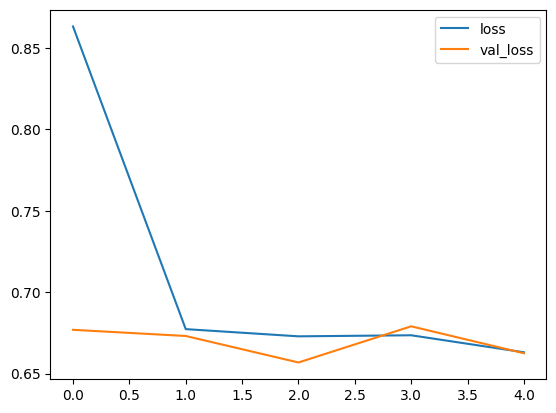

In [29]:
losses[['loss', 'val_loss']].plot()

<Axes: >

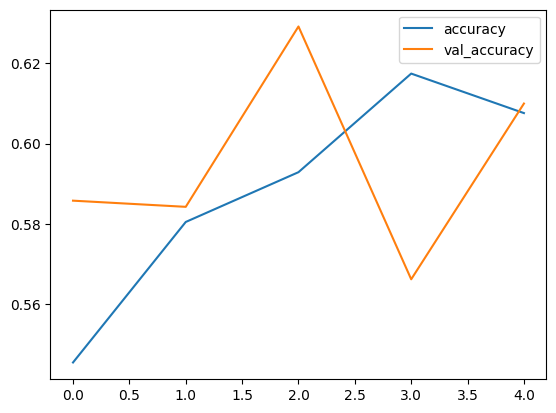

In [34]:
losses[['accuracy', 'val_accuracy']].plot()

In [32]:
model.metrics_names

['loss', 'compile_metrics']

In [36]:
model.evaluate(test_image_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 38s 228ms/step - accuracy: 0.6378 - loss: 0.6514


[0.6608715057373047, 0.6146153807640076]

In [37]:
model.metrics_names

['loss', 'compile_metrics']

Evaluation of the model

In [38]:
pred = model.predict(test_image_gen)
pred

163/163 ━━━━━━━━━━━━━━━━━━━━ 18s 109ms/step


array([[0.3177926 ],
       [0.37725213],
       [0.27028987],
       ...,
       [0.3905627 ],
       [0.5185808 ],
       [0.4115515 ]], dtype=float32)

In [39]:
predictions = pred > 0.5
predictions

array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [40]:
len(pred)

2600

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.61      0.64      0.63      1300
           1       0.63      0.59      0.61      1300

    accuracy                           0.62      2600
   macro avg       0.62      0.62      0.62      2600
weighted avg       0.62      0.62      0.62      2600



In [42]:
print(confusion_matrix(test_image_gen.classes, predictions))

[[838 462]
 [528 772]]
